# Books Goodreader

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! head -n 2 books-goodreader.csv

bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
1,Harry Potter and the Half-Blood Prince (Harry Potter  #6),J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249


In [3]:
! wc -l books-goodreader.csv #Tiene 13720 filas
! awk -F, '{print NF; exit}' books-goodreader.csv #Para saber el número de columnas

13720 books-goodreader.csv
10


In [4]:
df = pd.read_csv("books-goodreader.csv", sep=',', error_bad_lines=False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [117]:
print(df.shape)
df.describe().round(decimals=0)

(13714, 10)


bookID  average_rating        isbn13  # num_pages  ratings_count  \
count  13714.0         13714.0  1.371400e+04      13714.0        13714.0   
mean   22160.0             4.0  9.764017e+12        342.0        17765.0   
std    13701.0             0.0  3.987679e+11        253.0       112957.0   
min        1.0             0.0  8.987060e+09          0.0            0.0   
25%    10619.0             4.0  9.780345e+12        196.0           83.0   
50%    21322.0             4.0  9.780613e+12        301.0          630.0   
75%    33312.0             4.0  9.780940e+12        421.0         4742.0   
max    47709.0             5.0  9.790008e+12       6576.0      5629932.0   

       text_reviews_count  
count             13714.0  
mean                534.0  
std                2529.0  
min                   0.0  
25%                   7.0  
50%                  40.0  
75%                 222.0  
max               93619.0

In [6]:
df.sample(3) #Vemos una muestra 

bookID                                              title  \
11646   39401                                      Sweet Revenge   
12205   41730  Selected Writings: Complete Short Stories / Ty...   
13005   44950  Code of the Samurai: A Modern Translation of t...   

                                       authors  average_rating        isbn  \
11646                             Lynsay Sands            3.98  0843946806   
12205                          Herman Melville            3.53  0394607570   
13005  Daidōji Yūzan-Oscar Ratti-Thomas Cleary            4.04  0804831904   

              isbn13 language_code  # num_pages  ratings_count  \
11646  9780843946802           eng          400           1699   
12205  9780394607573           eng          903             14   
13005  9780804831901           eng          128           2155   

       text_reviews_count  
11646                  86  
12205                   1  
13005                  80

In [7]:
print(np.mean(df['ratings_count'])) #Cuál es la media de ratings?
print(np.median(df['ratings_count'])) #Cuál es la mediana de ratings?
print(np.std(df['ratings_count'])) # Vemos que la desviacion estándar es muy alta

17765.397258276214
630.5
112953.10718356872


In [8]:
#Porcentaje de datos respecto al total que tienen menos de 00 ratings
(df[df['ratings_count'] < 100].count())*100/ df.shape[0]

bookID                27.110981
title                 27.110981
authors               27.110981
average_rating        27.110981
isbn                  27.110981
isbn13                27.110981
language_code         27.110981
# num_pages           27.110981
ratings_count         27.110981
text_reviews_count    27.110981
dtype: float64

In [9]:
# Porcentaje de libros en español respecto al total
(df[df['language_code'] == 'spa'].count())*100/ df.shape[0]
# Porcentaje de libros en que no son en inglés
(df[df['language_code'] != 'eng'].count())*100/ df.shape[0]

bookID                22.750474
title                 22.750474
authors               22.750474
average_rating        22.750474
isbn                  22.750474
isbn13                22.750474
language_code         22.750474
# num_pages           22.750474
ratings_count         22.750474
text_reviews_count    22.750474
dtype: float64

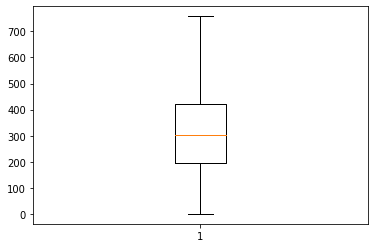

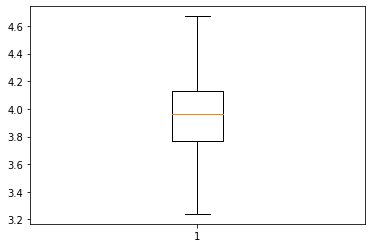

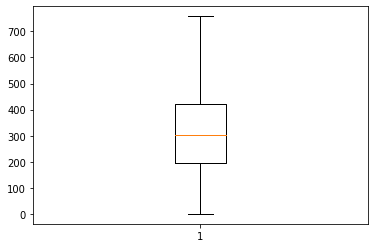

In [10]:
#Vamos a ver cómo están distribuidos los datos, quitando los outliers
plt.boxplot(df['# num_pages'], showfliers=False)
plt.show()
plt.boxplot(df['average_rating'], showfliers=False)
plt.show()
plt.boxplot(df['# num_pages'], showfliers=False)
plt.show()

In [11]:
#Agrupamos por media y contamos los que hay con determinados rangos de puntuación
df_group = df.groupby(pd.cut(df["average_rating"], np.arange(0, 5.0, 0.5))).count()
df_group

bookID  title  authors  average_rating  isbn  isbn13  \
average_rating                                                         
(0.0, 0.5]           0      0        0               0     0       0   
(0.5, 1.0]           2      2        2               2     2       2   
(1.0, 1.5]           0      0        0               0     0       0   
(1.5, 2.0]          11     11       11              11    11      11   
(2.0, 2.5]           9      9        9               9     9       9   
(2.5, 3.0]          79     79       79              79    79      79   
(3.0, 3.5]         862    862      862             862   862     862   
(3.5, 4.0]        6959   6959     6959            6959  6959    6959   
(4.0, 4.5]        5515   5515     5515            5515  5515    5515   

                language_code  # num_pages  ratings_count  text_reviews_count  
average_rating                                                                 
(0.0, 0.5]                  0            0              0                   0  
(0.5, 1.0]                  2            2              2                   2  
(1.0, 1.5]                  0            0              0                   0  
(1.5, 2.0]                 11           11             11                  11  
(2.0, 2.5]                  9            9              9                   9  
(2.5, 3.0]                 79           79             79                  79  
(3.0, 3.5]                862          862            862                 862  
(3.5, 4.0]               6959         6959           6959                6959  
(4.0, 4.5]               5515         5515           5515                5515

In [12]:
#Ahora hacemos esto así porque si hacemos lo anterior sale error, porque 
# "float() argument must be a string or a number, not 'pandas._libs.interval.Interval'"" y si lo
# Hacemos lista se reduce el número de datos, habría que hacer otra columna con los rangos.
df_per_date =df.groupby("average_rating").count()
df_per_date

bookID  title  authors  isbn  isbn13  language_code  \
average_rating                                                        
0.00                34     34       34    34      34             34   
1.00                 2      2        2     2       2              2   
1.67                 1      1        1     1       1              1   
2.00                10     10       10    10      10             10   
2.33                 2      2        2     2       2              2   
...                ...    ...      ...   ...     ...            ...   
4.86                 1      1        1     1       1              1   
4.87                 1      1        1     1       1              1   
4.88                 1      1        1     1       1              1   
4.91                 1      1        1     1       1              1   
5.00                28     28       28    28      28             28   

                # num_pages  ratings_count  text_reviews_count  
average_rating                                                  
0.00                     34             34                  34  
1.00                      2              2                   2  
1.67                      1              1                   1  
2.00                     10             10                  10  
2.33                      2              2                   2  
...                     ...            ...                 ...  
4.86                      1              1                   1  
4.87                      1              1                   1  
4.88                      1              1                   1  
4.91                      1              1                   1  
5.00                     28             28                  28  

[216 rows x 9 columns]

In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


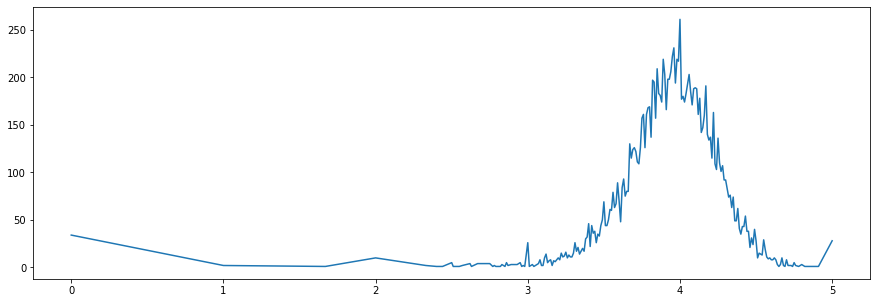

In [14]:
# Así vemos donde se situan los libros mejor en un gráfico, con el conteo de todas las notas
plt.figure(figsize=(15,5))
plt.plot(df_per_date.index, df_per_date["# num_pages"]);

In [19]:
df[df["ratings_count"] == 0].count()
# Valores que no tienen ratings

bookID                114
title                 114
authors               114
average_rating        114
isbn                  114
isbn13                114
language_code         114
# num_pages           114
ratings_count         114
text_reviews_count    114
dtype: int64

In [102]:
df.shape

(13714, 10)

In [165]:
#Para investigar mejor lo anterior quitamos los outliers de páginas
df_nooutliners = df[df["# num_pages"] < 2000]
df_nooutliners = df_nooutliners[df_nooutliners["# num_pages"] > 0]
#Quitamos los outliers de mediarating
df_nooutliners = df_nooutliners[df_nooutliners["average_rating"] > 1]
#Quitamos los outliers de ratings counts
df_nooutliners = df_nooutliners[df_nooutliners["ratings_count"] < 2000000]
#Quitamos los outliers de ratings counts
df_nooutliners = df_nooutliners[df_nooutliners["ratings_count"] > 0]

Text(0, 0.5, 'Media Ratings')

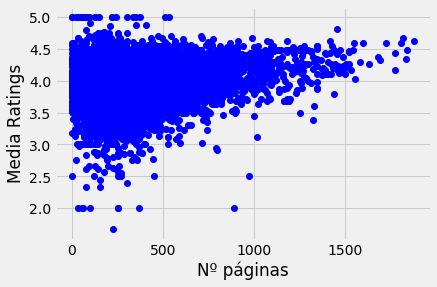

In [166]:
#Hay correlación entre número de páginas y Media de ratings?
plt.plot(df_nooutliners["# num_pages"], df_nooutliners["average_rating"], "bo")
plt.xlabel("Nº páginas")
plt.ylabel("Media Ratings")

Text(0, 0.5, 'Nº páginas')

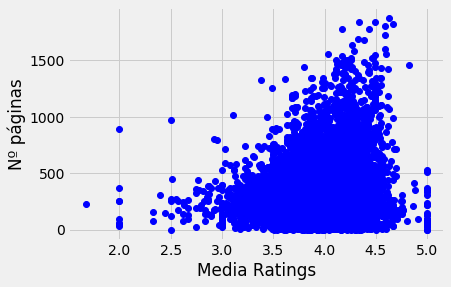

In [167]:
#Hay correlación entre número de páginas y Media de ratings?
plt.plot(df_nooutliners["average_rating"], df_nooutliners["# num_pages"], "bo")
plt.xlabel("Media Ratings")
plt.ylabel("Nº páginas")

Text(0, 0.5, 'ratings count')

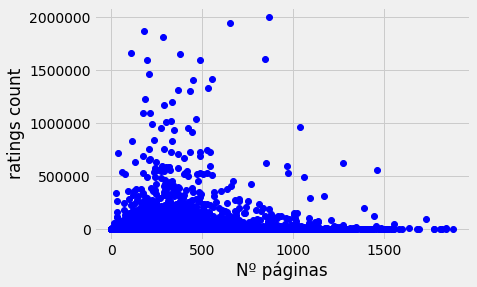

In [148]:
#Hay correlación entre número de páginas y Media de ratings?
plt.plot(df_nooutliners["# num_pages"], df_nooutliners['ratings_count'], "bo")
plt.xlabel("Nº páginas")
plt.ylabel("ratings count")

In [169]:
r = df_nooutliners.corr(method="pearson")["# num_pages"]["average_rating"]
r
#Realmente no hay mucha correlación

0.18035950995291816

## Data preparation

In [183]:
df_nooutliners3.describe().round(decimals=0)

average_rating  # num_pages  ratings_count
count         13480.0      13480.0        13480.0
mean              4.0        340.0        16175.0
std               0.0        221.0        82285.0
min               2.0          1.0            1.0
25%               4.0        199.0           90.0
50%               4.0        303.0          662.0
75%               4.0        422.0         4840.0
max               5.0       1878.0      1996446.0

In [170]:
df_nooutliners3 = df_nooutliners.iloc[:, [3,7,8]]

In [171]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_nooutliners3)
scaled_df = pd.DataFrame(scaled_df, columns=['average_rating' , '# num_pages' , 'ratings_count'])

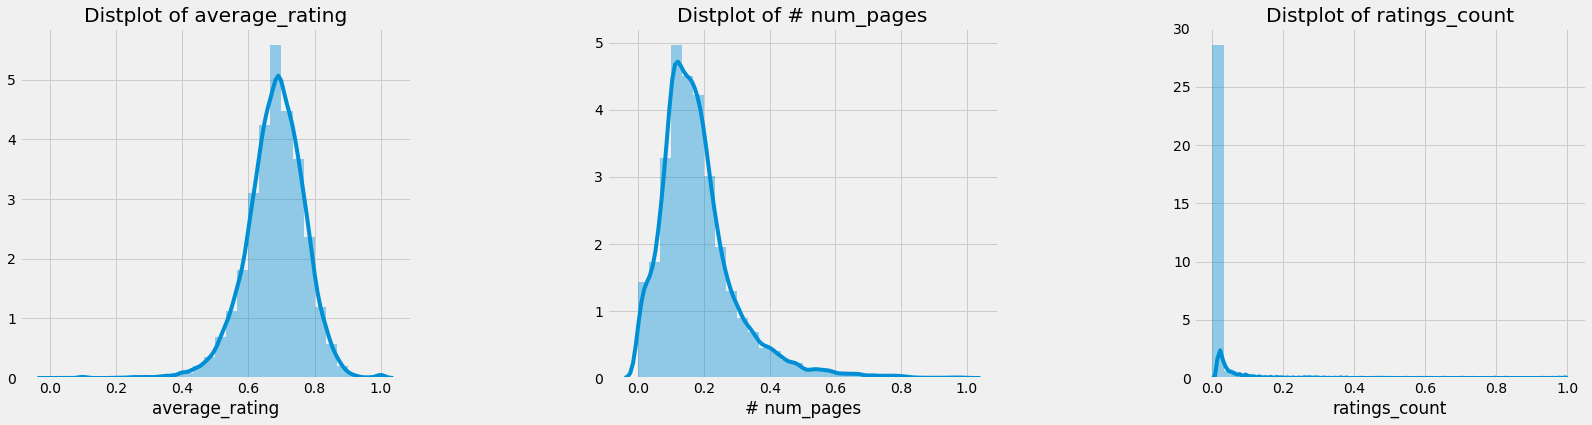

In [172]:
plt.figure(1 , figsize = (25 , 6)) #Aquí define el tamaño
n = 0
for x in ['average_rating' , '# num_pages' , 'ratings_count']: #Aquí hace loop para imprimir los tres gráficos de la misma forma
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(scaled_df[x] , bins = 30) #define el número de barras
    plt.title('Distplot of {}'.format(x))
plt.show()

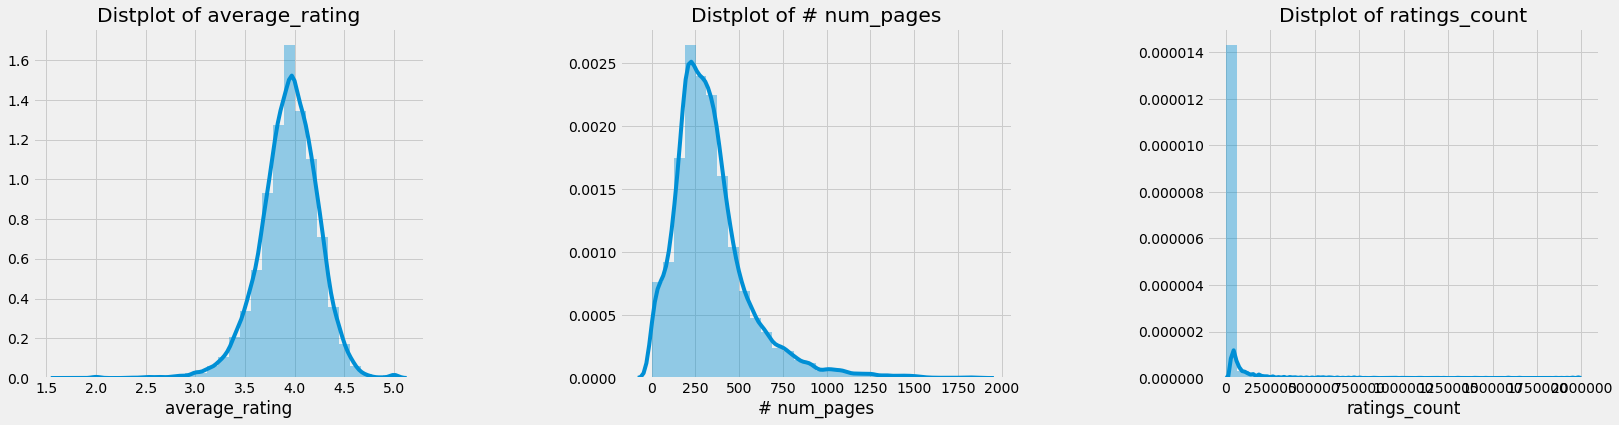

In [173]:
plt.figure(1 , figsize = (25 , 6)) #Aquí define el tamaño
n = 0
for x in ['average_rating' , '# num_pages' , 'ratings_count']: #Aquí hace loop para imprimir los tres gráficos de la misma forma
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df_nooutliners3[x] , bins = 30) #define el número de barras
    plt.title('Distplot of {}'.format(x))
plt.show()

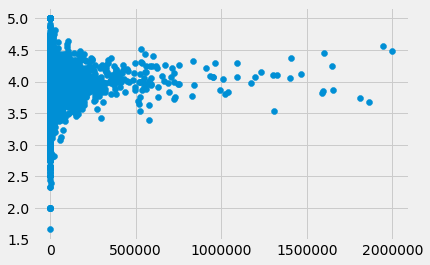

In [174]:
plt.scatter(df_nooutliners.ratings_count, df_nooutliners.average_rating)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a30eb96d8>]],
      dtype=object)

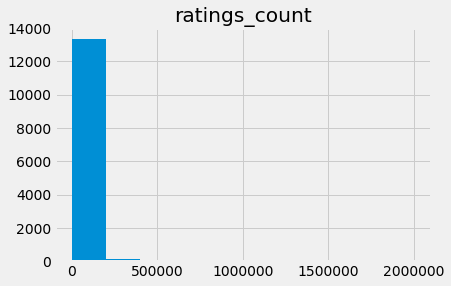

In [155]:
df_nooutliners.hist(column='ratings_count', bins=10)

## Probando a hacer un Kmeans